In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
 
ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)
 
drive.mount(ROOT)           # we mount the google drive at /content/drive

/content/drive
Mounted at /content/drive


In [ ]:
import os

def restart_runtime():
  os.kill(os.getpid(), 9)
restart_runtime()

In [1]:
# %matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

import numpy as np

# Loading Raw Data

In [2]:
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
x_train_flatten = x_train.reshape(x_train.shape[0], x_train.shape[1]*x_train.shape[2])/255.0
x_test_flatten = x_test.reshape(x_test.shape[0], x_test.shape[1]*x_test.shape[2])/255.0

In [4]:
print(x_train_flatten.shape, y_train.shape)
print(x_test_flatten.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [5]:
x_train_0 = x_train_flatten[y_train == 0]
x_train_1 = x_train_flatten[y_train == 1]
x_train_2 = x_train_flatten[y_train == 2]
x_train_3 = x_train_flatten[y_train == 3]
x_train_4 = x_train_flatten[y_train == 4]
x_train_5 = x_train_flatten[y_train == 5]
x_train_6 = x_train_flatten[y_train == 6]
x_train_7 = x_train_flatten[y_train == 7]
x_train_8 = x_train_flatten[y_train == 8]
x_train_9 = x_train_flatten[y_train == 9]

x_train_list = [x_train_0, x_train_1, x_train_2, x_train_3, x_train_4, x_train_5, x_train_6, x_train_7, x_train_8, x_train_9]

print(x_train_0.shape)
print(x_train_1.shape)
print(x_train_2.shape)
print(x_train_3.shape)
print(x_train_4.shape)
print(x_train_5.shape)
print(x_train_6.shape)
print(x_train_7.shape)
print(x_train_8.shape)
print(x_train_9.shape)

(5923, 784)
(6742, 784)
(5958, 784)
(6131, 784)
(5842, 784)
(5421, 784)
(5918, 784)
(6265, 784)
(5851, 784)
(5949, 784)


In [6]:
x_test_0 = x_test_flatten[y_test == 0]
x_test_1 = x_test_flatten[y_test == 1]
x_test_2 = x_test_flatten[y_test == 2]
x_test_3 = x_test_flatten[y_test == 3]
x_test_4 = x_test_flatten[y_test == 4]
x_test_5 = x_test_flatten[y_test == 5]
x_test_6 = x_test_flatten[y_test == 6]
x_test_7 = x_test_flatten[y_test == 7]
x_test_8 = x_test_flatten[y_test == 8]
x_test_9 = x_test_flatten[y_test == 9]

x_test_list = [x_test_0, x_test_1, x_test_2, x_test_3, x_test_4, x_test_5, x_test_6, x_test_7, x_test_8, x_test_9]

print(x_test_0.shape)
print(x_test_1.shape)
print(x_test_2.shape)
print(x_test_3.shape)
print(x_test_4.shape)
print(x_test_5.shape)
print(x_test_6.shape)
print(x_test_7.shape)
print(x_test_8.shape)
print(x_test_9.shape)

(980, 784)
(1135, 784)
(1032, 784)
(1010, 784)
(982, 784)
(892, 784)
(958, 784)
(1028, 784)
(974, 784)
(1009, 784)


# Selecting the dataset

Output: X_train, Y_train, X_test, Y_test

In [37]:
X_train = np.concatenate((x_train_list[0][:180, :], x_train_list[1][:20, :], x_train_list[2][:20, :],
                          x_train_list[3][:20, :], x_train_list[4][:20, :], x_train_list[5][:20, :],
                          x_train_list[6][:20, :], x_train_list[7][:20, :], x_train_list[8][:20, :],
                          x_train_list[9][:20, :]), axis=0)
Y_train = np.zeros((X_train.shape[0],))
Y_train[180:] += 1

X_train.shape, Y_train.shape

((360, 784), (360,))

In [38]:
X_test = np.concatenate((x_test_list[0][:45, :], x_test_list[1][:5, :], x_test_list[2][:5, :],
                         x_test_list[3][:5, :], x_test_list[4][:5, :], x_test_list[5][:5, :],
                         x_test_list[6][:5, :], x_test_list[7][:5, :], x_test_list[8][:5, :],
                         x_test_list[9][:5, :]), axis=0)
Y_test = np.zeros((X_test.shape[0],))
Y_test[45:] += 1

X_test.shape, Y_test.shape

((90, 784), (90,))

# Dataset Preprocessing (Standardization + PCA)

## Standardization

In [39]:
def normalize(X, use_params=False, params=None):
    """Normalize the given dataset X
    Args:
        X: ndarray, dataset
    
    Returns:
        (Xbar, mean, std): tuple of ndarray, Xbar is the normalized dataset
        with mean 0 and standard deviation 1; mean and std are the 
        mean and standard deviation respectively.
    
    Note:
        You will encounter dimensions where the standard deviation is
        zero, for those when you do normalization the normalized data
        will be NaN. Handle this by setting using `std = 1` for those 
        dimensions when doing normalization.
    """
    if use_params:
        mu = params[0]
        std_filled = [1]
    else:
        mu = np.mean(X, axis=0)
        std = np.std(X, axis=0)
        #std_filled = std.copy()
    #std_filled[std==0] = 1.
    Xbar = (X - mu)/(std + 1e-8)
    return Xbar, mu, std


In [40]:
X_train, mu_train, std_train = normalize(X_train)
X_train.shape, Y_train.shape

((360, 784), (360,))

In [41]:
X_test = (X_test - mu_train)/(std_train + 1e-8)
X_test.shape, Y_train.shape

((90, 784), (360,))

## PCA

In [42]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

In [43]:
num_component = 2
pca = PCA(n_components=num_component, svd_solver='full')

In [44]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='full', tol=0.0, whiten=False)

In [45]:
np.cumsum(pca.explained_variance_ratio_)

array([0.11260102, 0.19824368])

In [46]:
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

In [65]:
X_train = (X_train.T / np.sqrt(np.sum(X_train ** 2, -1))).T
X_test = (X_test.T / np.sqrt(np.sum(X_test ** 2, -1))).T

In [66]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(360, 2) (360,)
(90, 2) (90,)


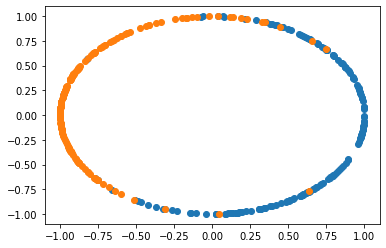

In [67]:
plt.scatter(X_train[:180, 0], X_train[:180, 1])
plt.scatter(X_train[180:, 0], X_train[180:, 1])

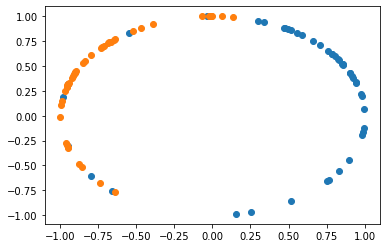

In [68]:
plt.scatter(X_test[:45, 0], X_test[:45, 1])
plt.scatter(X_test[45:, 0], X_test[45:, 1])

# Classical

## Binary

In [30]:
from keras.layers.core import Dense, Activation
from keras.layers import Dropout
from keras.models import Sequential
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils
import keras

In [61]:
def nn_model(input_dim):

    LR1 = 0
    dropout_rate = 0

    model = Sequential()

    model.add(Dense(2, input_dim=input_dim))
    model.add(Activation('relu'))
    model.add(Dense(1, input_dim=input_dim))
    model.add(Activation('sigmoid'))

    model.compile(loss='mse', optimizer=RMSprop(lr=0.01), metrics=['accuracy'])
    return model

In [62]:
num_component = 2
nn = nn_model(num_component)

In [63]:
nn.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 2)                 6         
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 3         
_________________________________________________________________
activation_9 (Activation)    (None, 1)                 0         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [64]:
nn.fit(X_train, Y_train, verbose=1, epochs=100, batch_size=8, validation_data=(X_test, Y_test))

Epoch 1/100
45/45 [==============================] - 1s 4ms/step - loss: 0.2309 - accuracy: 0.7722 - val_loss: 0.2484 - val_accuracy: 0.7111
Epoch 2/100
45/45 [==============================] - 0s 2ms/step - loss: 0.1583 - accuracy: 0.8538 - val_loss: 0.1396 - val_accuracy: 0.8333
Epoch 3/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0835 - accuracy: 0.9080 - val_loss: 0.0758 - val_accuracy: 0.9000
Epoch 4/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0634 - accuracy: 0.9222 - val_loss: 0.0678 - val_accuracy: 0.9000
Epoch 5/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0544 - accuracy: 0.9260 - val_loss: 0.0638 - val_accuracy: 0.9111
Epoch 6/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0506 - accuracy: 0.9272 - val_loss: 0.0617 - val_accuracy: 0.9111
Epoch 7/100
45/45 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9298 - val_loss: 0.0600 - val_accuracy: 0.9111
Epoch 8/100
4